In [1]:
import pandas as pd
df = pd.read_csv('Bank Customer Churn Prediction.csv')
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [2]:
df.drop('customer_id',axis=1, inplace=True)

In [3]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['country'] = le.fit_transform(df['country'])
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print(df.max())

credit_score           850.00
country                  2.00
gender                   1.00
age                     92.00
tenure                  10.00
balance             250898.09
products_number          4.00
credit_card              1.00
active_member            1.00
estimated_salary    199992.48
churn                    1.00
dtype: float64


In [6]:
print(df.min())

credit_score        350.00
country               0.00
gender                0.00
age                  18.00
tenure                0.00
balance               0.00
products_number       1.00
credit_card           0.00
active_member         0.00
estimated_salary     11.58
churn                 0.00
dtype: float64


In [7]:
df['credit_score'] = (df['credit_score'] - df['credit_score'].mean())/df['credit_score'].std()
df['age'] = (df['age'] - df['age'].mean())/df['age'].std()
df['balance'] = (df['balance'] - df['balance'].mean())/df['balance'].std()
df['estimated_salary'] = (df['estimated_salary'] - df['estimated_salary'].mean())/df['estimated_salary'].std()
df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326205,0,0,0.293503,-1.041708,-1.225786,1,1,1,0.021885,1
1,-0.440014,2,0,0.198154,-1.387468,0.117344,1,0,1,0.216523,0
2,-1.536717,0,0,0.293503,1.032856,1.332987,3,1,0,0.240675,1
3,0.501496,0,0,0.007456,-1.387468,-1.225786,2,0,0,-0.108912,0
4,2.063781,2,0,0.388852,-1.041708,0.785689,1,1,1,-0.365258,0


In [8]:
print(df.max())

credit_score        2.063781
country             2.000000
gender              1.000000
age                 5.060944
tenure              1.724377
balance             2.795184
products_number     4.000000
credit_card         1.000000
active_member       1.000000
estimated_salary    1.737113
churn               1.000000
dtype: float64


In [9]:
print(df.min())

credit_score       -3.109349
country             0.000000
gender              0.000000
age                -1.994869
tenure             -1.733229
balance            -1.225786
products_number     1.000000
credit_card         0.000000
active_member       0.000000
estimated_salary   -1.740181
churn               0.000000
dtype: float64


In [10]:
a=df.shape
print(a[1])

11


In [11]:
from sklearn.model_selection import train_test_split
X = df[['credit_score','country','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']]  # Independent variables (features)
y = df['churn']  # Dependent variable (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [12]:
print(X_train.iloc[0])

credit_score        0.366994
country             0.000000
gender              1.000000
age                -0.659985
tenure              0.341335
balance            -1.225786
products_number     2.000000
credit_card         1.000000
active_member       1.000000
estimated_salary    1.373715
Name: 9254, dtype: float64


learning Rate 0.0001
hidden Neuron 2
Iteration 0: Cost = 0.6930923748049798
Iteration 1000: Cost = 0.5046720148879891
Iteration 2000: Cost = 0.47896578250321126
Iteration 3000: Cost = 0.45688920407801287
Iteration 4000: Cost = 0.44494537904318404
Iteration 5000: Cost = 0.4396069142034167
Iteration 6000: Cost = 0.4372692764203398
Iteration 7000: Cost = 0.4361876418149942
Iteration 8000: Cost = 0.43561649644513056
Iteration 9000: Cost = 0.43526447278356306
training_accuracy 0.7945
test_accuracy 0.8035
learning Rate 0.0001
hidden Neuron 4
Iteration 0: Cost = 0.6931888623046539
Iteration 1000: Cost = 0.5089958858950218
Iteration 2000: Cost = 0.49128386684047426
Iteration 3000: Cost = 0.4669956460215625
Iteration 4000: Cost = 0.4499672654487172
Iteration 5000: Cost = 0.4415461161343759
Iteration 6000: Cost = 0.4378481464526083
Iteration 7000: Cost = 0.4361328798546117
Iteration 8000: Cost = 0.4351130607548146
Iteration 9000: Cost = 0.4342069577047273
training_accuracy 0.79725
test_accuracy 

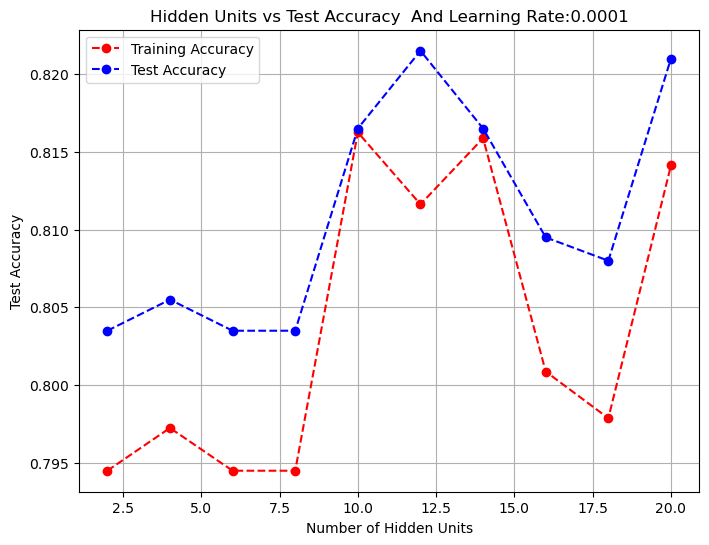

learning Rate 0.001
hidden Neuron 2
Iteration 0: Cost = 0.6931794134121391
Iteration 1000: Cost = 0.5113982892507839
Iteration 2000: Cost = 0.5080028733181792
Iteration 3000: Cost = 0.507543484115196
Iteration 4000: Cost = 0.5047995991648925
Iteration 5000: Cost = 0.4908466184397768
Iteration 6000: Cost = 0.46998249250891977
Iteration 7000: Cost = 0.4584151784327744
Iteration 8000: Cost = 0.45185544696790614
Iteration 9000: Cost = 0.4478541243320018
training_accuracy 0.80325
test_accuracy 0.8055
learning Rate 0.001
hidden Neuron 4
Iteration 0: Cost = 0.693175123420431
Iteration 1000: Cost = 0.5064464194554934
Iteration 2000: Cost = 0.4836305887500988
Iteration 3000: Cost = 0.460438242381748
Iteration 4000: Cost = 0.4467015271660134
Iteration 5000: Cost = 0.440377754995359
Iteration 6000: Cost = 0.43762317013414487
Iteration 7000: Cost = 0.4363562703968114
Iteration 8000: Cost = 0.4357100903007895
Iteration 9000: Cost = 0.4353367149863435
training_accuracy 0.7945
test_accuracy 0.8035
le

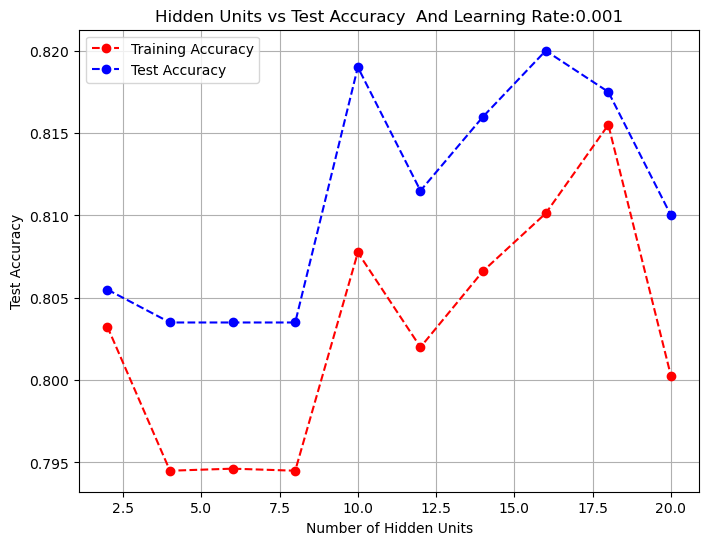

learning Rate 0.01
hidden Neuron 2
Iteration 0: Cost = 0.6931704172951972
Iteration 1000: Cost = 0.5113689138883576
Iteration 2000: Cost = 0.5076385684596416
Iteration 3000: Cost = 0.5044776130625737
Iteration 4000: Cost = 0.48968428069449293
Iteration 5000: Cost = 0.46334174221580227
Iteration 6000: Cost = 0.44369029175135155
Iteration 7000: Cost = 0.43696011146121166
Iteration 8000: Cost = 0.4339276877924715
Iteration 9000: Cost = 0.4313928582550725
training_accuracy 0.811
test_accuracy 0.816
learning Rate 0.01
hidden Neuron 4
Iteration 0: Cost = 0.6930725656115364
Iteration 1000: Cost = 0.5053763117314666
Iteration 2000: Cost = 0.480819683915549
Iteration 3000: Cost = 0.45834777983356945
Iteration 4000: Cost = 0.445672106058643
Iteration 5000: Cost = 0.43994601354911983
Iteration 6000: Cost = 0.43743100171458865
Iteration 7000: Cost = 0.43625714438438157
Iteration 8000: Cost = 0.4356556544531419
Iteration 9000: Cost = 0.43529677985321846
training_accuracy 0.7945
test_accuracy 0.8035

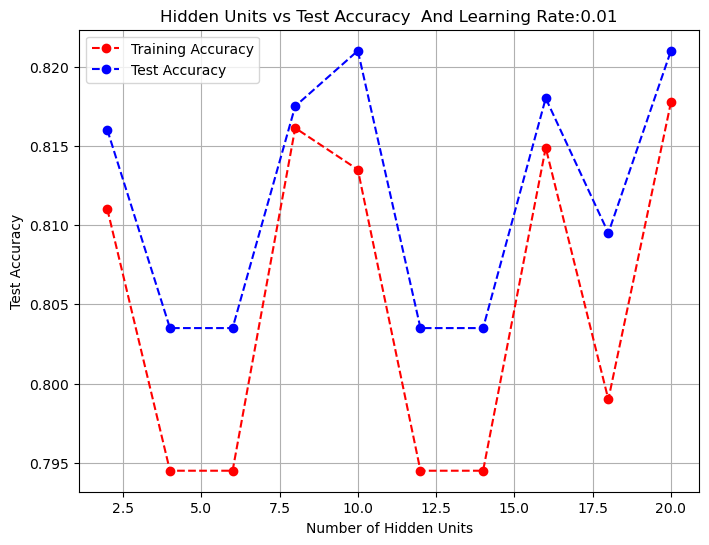

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, X_train, y_train, X_test, y_test,N_x, N_h, N_y, learning_rate=0.01):
        self.X_train = X_train
        self.y_train = y_train.to_numpy().reshape(-1, 1)
        self.X_test = X_test
        self.y_test =y_test.to_numpy().reshape(-1, 1)
        self.input_feature = N_x
        self.hidden_unit = N_h
        self.output_unit = N_y
        self.learning_rate = learning_rate  # Learning rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(N_x, N_h) * 0.01  # Weights for layer 1
        self.b1 = np.zeros((1, N_h))  # Biases for layer 1
        
        self.W2 = np.random.randn(N_h, N_y) * 0.01  # Weights for layer 2
        self.b2 = np.zeros((1, N_y))  # Biases for layer 2

    def function_sigmoid(self, x):
        x = x.astype(float)
        value = np.exp(-x)
        z = 1 / (1 + value)
        return z
    
    def function_relu(self, x):
        return np.maximum(0, x)  # Using numpy for vectorized operations

    def forward_pass(self, x):
        # Layer 1
        hidden1 = np.dot(x, self.W1) + self.b1
        z1 = self.function_relu(hidden1)

        # Layer 2
        hidden2 = np.dot(z1, self.W2) + self.b2
        z2 = self.function_sigmoid(hidden2)
        
        return z1, z2  # Return activations from both layers

    def compute_cost(self, c):
        m = self.y_train.shape[0]  # Number of training examples
        cost = -np.mean(self.y_train * np.log(c) + (1 - self.y_train) * np.log(1 - c))
        return cost

    def backpropagation(self, z1, z2):
        m = self.X_train.shape[0]  # Number of training examples

        # Backpropagation for layer 2 (output layer)
        dZ2 = z2 - self.y_train  # Gradient of cost with respect to z2
        dW2 = np.dot(z1.T, dZ2) / m  # Gradient for W2
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m  # Gradient for b2

        # Backpropagation for layer 1 (hidden layer)
        dZ1 = np.dot(dZ2, self.W2.T) * (z1 > 0)  # Gradient for ReLU
        dW1 = np.dot(self.X_train.T, dZ1) / m  # Gradient for W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m  # Gradient for b1

        # Update parameters
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        
     
    def predict(self):
        _, output = self.forward_pass(self.X_test)
        predictions = (output > 0.5).astype(int)  # Convert probabilities to binary output
        return predictions

    def test_accuracy(self):
        predictions = self.predict()
        accuracy = np.mean(predictions == self.y_test)  # Calculate accuracy
        return accuracy
    
    def predicttrain(self):
        _, output = self.forward_pass(self.X_train)
        predictions = (output > 0.5).astype(int)  # Convert probabilities to binary output
        return predictions

    def train_accuracy(self):
        predictions = self.predicttrain()
        accuracy = np.mean(predictions == self.y_train)  # Calculate accuracy
        return accuracy
             
    def function_fit(self, learning_rate ,epoch=10000):
        for i in range(epoch):
            # Forward pass
            z1,z2 = self.forward_pass(self.X_train)

            # Compute cost
            cost = self.compute_cost(z2)

            # Backpropagation
            self.backpropagation(z1 , z2)

            # Print cost every 100 iterations
            if i % 1000==0:
                print(f"Iteration {i}: Cost = {cost}")
        
        print("training_accuracy",self.train_accuracy())
        print("test_accuracy",self.test_accuracy())
        return (self.test_accuracy(),self.train_accuracy())

if __name__ == "__main__":

    abc = df.shape
    N_x = abc[1] - 1  # Number of features
    N_h = 2  # Number of hidden units
    N_y = 1  # Output layer size
    

    # Initialize and train the neural network
    hidden_units = list(range(2, 21, 2))
    learning_rates = [0.0001, 0.001, 0.01]
    for lr in learning_rates:
        acc = []
        acc1 =[]
        for N_h in hidden_units:
            print("learning Rate", lr)
            print("hidden Neuron",N_h)
            obj = NeuralNetwork(X_train, y_train, X_test, y_test, N_x, N_h, N_y)
            accu, accu1= obj.function_fit(0.001)
            acc.append(accu)
            acc1.append(accu1)

        plt.figure(figsize=(8, 6))
        plt.plot(hidden_units, acc1, marker='o', color='r', linestyle='--', label='Training Accuracy')
        plt.plot(hidden_units, acc, marker='o', color='b', linestyle='--', label='Test Accuracy')
        plt.title(f'Hidden Units vs Test Accuracy  And Learning Rate:{lr}')
        plt.xlabel('Number of Hidden Units')
        plt.ylabel('Test Accuracy')
        plt.grid(True)
        plt.legend()
        plt.show()


